In [1]:
import pandas as pd
df = pd.read_csv('./mobie_ds.csv')
df.sample(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
269,1281,1,2.3,1,0,0,28,0.3,148,1,...,1285,1617,1129,12,1,6,0,1,0,1
1499,1742,1,0.5,1,5,1,43,0.9,176,3,...,356,1407,1921,9,2,3,1,1,0,2
1216,1158,0,0.7,1,1,1,29,0.7,123,2,...,311,1796,1542,17,9,15,1,0,1,1
1378,826,0,0.5,1,0,1,57,0.5,135,2,...,354,530,323,17,3,7,1,0,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
X = df.drop(['price_range'],axis=1)
y = df['price_range']

#### Information gain

In [9]:
from sklearn.feature_selection import mutual_info_regression

In [10]:
ig = mutual_info_regression(X,y)

In [15]:
feature_scored={}
features =  df.columns[:-1]
for i in range(len(features)):
    feature_scored[features[i]] = ig[i]
feature_scored

{'battery_power': 0.03187427729411407,
 'blue': 0.0,
 'clock_speed': 0.0,
 'dual_sim': 0.022605193672448287,
 'fc': 0.0,
 'four_g': 0.0,
 'int_memory': 0.03653347458034695,
 'm_dep': 0.0,
 'mobile_wt': 0.006266588175543042,
 'n_cores': 0.013848523060432605,
 'pc': 0.00258387418278172,
 'px_height': 0.029018664144286,
 'px_width': 0.03148529254705501,
 'ram': 0.8475818520658143,
 'sc_h': 0.013336097393178648,
 'sc_w': 0.016016367623884697,
 'talk_time': 0.012407518091912095,
 'three_g': 0.01813140827401094,
 'touch_screen': 0.025542197807931544,
 'wifi': 0.0}

In [20]:
import seaborn as sb

<AxesSubplot:xlabel='info. gain', ylabel='features'>

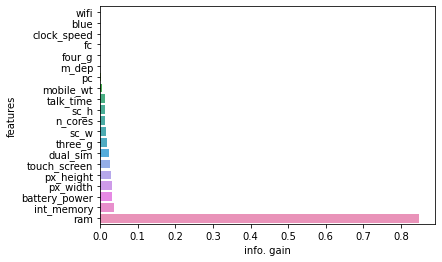

In [39]:
sb.barplot(orient='h',data=pd.DataFrame({'features':feature_scored.keys(),'info. gain':feature_scored.values()}).sort_values("info. gain",),y='features',x='info. gain')

In [38]:
top_10_f = sorted(feature_scored.items(),key= lambda x : x[1],reverse=True)
top_10_f

[('ram', 0.8475818520658143),
 ('int_memory', 0.03653347458034695),
 ('battery_power', 0.03187427729411407),
 ('px_width', 0.03148529254705501),
 ('px_height', 0.029018664144286),
 ('touch_screen', 0.025542197807931544),
 ('dual_sim', 0.022605193672448287),
 ('three_g', 0.01813140827401094),
 ('sc_w', 0.016016367623884697),
 ('n_cores', 0.013848523060432605),
 ('sc_h', 0.013336097393178648),
 ('talk_time', 0.012407518091912095),
 ('mobile_wt', 0.006266588175543042),
 ('pc', 0.00258387418278172),
 ('blue', 0.0),
 ('clock_speed', 0.0),
 ('fc', 0.0),
 ('four_g', 0.0),
 ('m_dep', 0.0),
 ('wifi', 0.0)]